In [1]:
! pip install scikit-plot

In [2]:
import pandas as pd

In [3]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [4]:
ok_num.sample(5)

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
8532,56443,23,0,1,0,1,0,2,0,3,66.0,20000,1,0,0
4975,32453,34,0,0,0,1,0,2,0,2,69.0,0,1,1,0
669,4317,41,0,1,2,2,0,0,0,2,66.0,0,2,1,0
8106,53806,31,0,0,0,1,0,2,0,1,70.0,50000,1,1,2
1288,8221,40,0,1,0,2,0,2,0,1,67.0,40000,2,0,4


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 
#!pip install scikit-plot
from matplotlib import cm
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score


In [6]:
import scikitplot as skplt

In [7]:
ok_num.index = ok_num.id
del ok_num['id']

In [8]:
ok_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 59944
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9055 non-null   int64  
 1   status       9055 non-null   int64  
 2   sex          9055 non-null   int64  
 3   orientation  9055 non-null   int64  
 4   body_type    9055 non-null   int64  
 5   diet         9055 non-null   int64  
 6   drinks       9055 non-null   int64  
 7   drugs        9055 non-null   int64  
 8   education    9055 non-null   int64  
 9   height       9055 non-null   float64
 10  income       9055 non-null   int64  
 11  offspring    9055 non-null   int64  
 12  pets         9055 non-null   int64  
 13  smokes       9055 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1.0 MB


The standard deviation of each column are really different. Therefore, we need to scale it to the same unit.

In [9]:
ok_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9055.0,34.470237,11.422735,18.0,26.0,31.0,41.0,69.0
status,9055.0,0.115958,0.450099,0.0,0.0,0.0,0.0,3.0
sex,9055.0,0.458421,0.498296,0.0,0.0,0.0,1.0,1.0
orientation,9055.0,0.187852,0.518645,0.0,0.0,0.0,0.0,2.0
body_type,9055.0,2.296963,1.509870,0.0,1.0,2.0,4.0,5.0
diet,9055.0,0.318277,0.881587,0.0,0.0,0.0,0.0,4.0
drinks,9055.0,1.830701,0.795633,0.0,2.0,2.0,2.0,5.0
drugs,9055.0,0.214136,0.440870,0.0,0.0,0.0,0.0,2.0
education,9055.0,1.517725,1.200697,0.0,1.0,1.0,2.0,6.0
height,9055.0,68.063943,3.991818,43.0,65.0,68.0,71.0,95.0


In [10]:
scaler = StandardScaler()
scaler.fit(ok_num)
ok_scaled = scaler.transform(ok_num) 

Before fitting and transform our data in model. PCA is used to reduce the dimensions of our data which only remains principle components.

In [11]:
#Fit our PCA model
pca=PCA() 
pcs=pca.fit_transform(ok_scaled)

By looking at the plot of explaned variance ratio, pc from 4 to 7 is considered a decent number. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


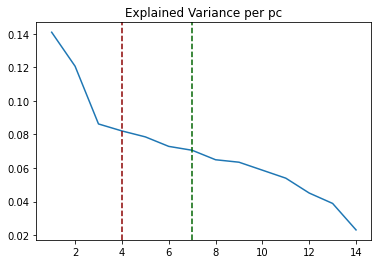

In [12]:
#variance explanation ratio--pc explained varaince
varexp=pca.explained_variance_ratio_
plt.title("Explained Variance per pc")
sns.lineplot(range(1,len(varexp)+1),varexp)
plt.axvline(x=4,color='darkred', linestyle='--')
plt.axvline(x=7, color='darkgreen', linestyle='--')
plt.show()  

The accumulated variance explained by pc plot showing that 80% of the variance can be explained by 9 pc. Therefore, 9 is the number of the pc we retain.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


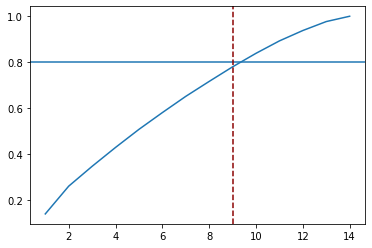

In [13]:
sns.lineplot(range(1, len(varexp)+1),np.cumsum(varexp))
plt.axhline(.8)
plt.axvline(9,linestyle='--',color='darkred') 
plt.show()

However, there is no correlation between each principle component. Therefore,we try two methods
1. we keep all the variables.
2. we keep 9 pcs.
Compare two and pick the best one.




1. keep all the variables.

In [14]:
comps=pca.components_
COLS=["PC"+ str(i) for i in range (1, len(comps)+1)]
COLS
X = pd.DataFrame(pcs[:,:],columns=COLS[:],index=ok_num.index)
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
id,,,,,,,,,,,,,,
0,1.958581,-0.673831,-0.697495,-0.674083,-1.156697,0.212461,-0.886518,-0.039052,-0.481319,-0.155472,0.658797,1.752937,-0.244519,0.539130
1,1.244404,-0.443357,3.610190,-0.007197,2.544415,0.616331,-1.123851,-1.018253,-2.968309,1.859831,-1.404107,-0.475974,-0.920575,-0.626927
7,-1.151655,0.993728,-0.658561,-0.590943,-0.156431,-0.420585,-0.443605,0.538870,-0.063528,0.395683,-0.267473,0.090146,-0.297052,0.201618
14,-1.351943,1.591256,-0.597592,-0.706638,-0.037705,-0.217245,-0.504011,1.210497,-0.183109,0.430038,-0.288016,0.062243,-0.393743,-0.333516
19,0.830173,-1.405865,-0.727364,0.141330,0.662551,-1.201929,-0.188489,-0.388744,-0.025891,0.035984,-0.085462,0.104026,0.464689,0.108962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59907,2.885001,0.818801,-0.515337,-1.018505,-1.004805,1.387490,0.010253,0.262630,-1.126929,-0.136512,0.604486,-0.300962,0.246258,0.088549
59913,-0.744925,1.209143,-1.094379,-0.357160,0.636073,-0.748894,-0.479281,0.270965,0.236076,0.303988,-0.012299,-0.087396,0.392856,0.121206
59920,0.796725,1.624014,-0.748355,-0.584959,0.112788,-0.386426,-0.572505,0.227372,-0.253426,0.462124,-0.171966,-1.611128,-0.460201,0.819913


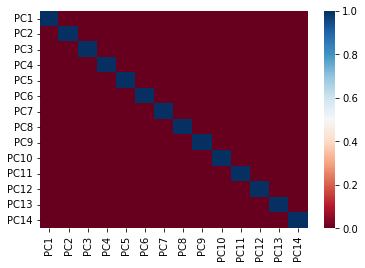

In [15]:
pc_cor=X.corr()
sns.heatmap(pc_cor,cmap='RdBu')

# **K-Means Model**

We take the range from 2-30 clusters and see the optimal number of clsters based on the elbow method and the silhouette score.

In [16]:
#K-means
KS = range(2, 30)
inertia = []
silo = []
X1 = X.values

for k in KS:
  km = KMeans(k)
  km.fit(X1)
  labs = km.predict(X1)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(X1, labs))


**Elbow Method and Silohuette Score Plot**

The plot on the left shows that inertia for the number of clusters, and the optimal k is between 8 and 13, and the silohuette score plot shows that the peak of the plot is located at 9. Therefore, k of 9 is our decision for the k.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


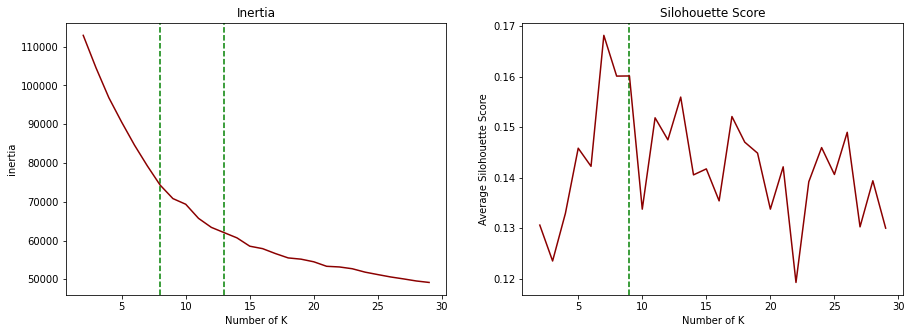

In [17]:

plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
plt.axvline(8,linestyle="--",color="green")
plt.axvline(13, linestyle="--",color='green')
plt.xlabel("Number of K")
plt.ylabel("inertia")
sns.lineplot(KS, inertia,color="darkred")

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
plt.axvline(9,linestyle="--",color="green")
plt.xlabel("Number of K")
plt.ylabel("Average Silohouette Score")
sns.lineplot(KS, silo,color='darkred')

plt.show()

In [18]:
k9A=KMeans(9) #initaite the project
k9A.fit(X) #fit the model
labs=k9A.predict(X) 

**Sihouette Plot**
1. The silhouette score plot shows that the distribution of each cluster is uneven.

2. There are negative values in some of the cluster which indicates misclustering. 

3. the average sihouette score is 0.160. 

In [20]:
silo_overall=metrics.silhouette_score(X,k11.predict(X))
silo_overall

silo_sample=metrics.silhouette_samples(X,k11.predict(X))
silo_sample

#plotting
skplt.metrics.plot_silhouette(X,k11.predict(X),figsize=(10,8))
plt.show()

NameError: ignored

Method 2: We keep 9 pcs

In [21]:
comps=pca.components_
COLS=["PC"+ str(i) for i in range (1, len(comps)+1)]
COLS
XX = pd.DataFrame(pcs[:,:9],columns=COLS[:9],index=ok_num.index)
XX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
id,,,,,,,,,
0,1.958581,-0.673831,-0.697495,-0.674083,-1.156697,0.212461,-0.886518,-0.039052,-0.481319
1,1.244404,-0.443357,3.610190,-0.007197,2.544415,0.616331,-1.123851,-1.018253,-2.968309
7,-1.151655,0.993728,-0.658561,-0.590943,-0.156431,-0.420585,-0.443605,0.538870,-0.063528
14,-1.351943,1.591256,-0.597592,-0.706638,-0.037705,-0.217245,-0.504011,1.210497,-0.183109
19,0.830173,-1.405865,-0.727364,0.141330,0.662551,-1.201929,-0.188489,-0.388744,-0.025891
...,...,...,...,...,...,...,...,...,...
59907,2.885001,0.818801,-0.515337,-1.018505,-1.004805,1.387490,0.010253,0.262630,-1.126929
59913,-0.744925,1.209143,-1.094379,-0.357160,0.636073,-0.748894,-0.479281,0.270965,0.236076
59920,0.796725,1.624014,-0.748355,-0.584959,0.112788,-0.386426,-0.572505,0.227372,-0.253426


In [22]:
#K-means
KS = range(2, 30)
inertia = []
silo = []
XX1 = XX.values

for k in KS:
  km = KMeans(k)
  km.fit(XX1)
  labs = km.predict(XX1)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(XX1, labs))

**Elbow Method and Silohuette Score Plot**

The plot on the left shows that inertia for the number of clusters, and the optimal k is between 6 and 10, and the silohuette score plot shows that the peak of the plot is located at 8. Therefore, k of 8 is our decision for the k.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


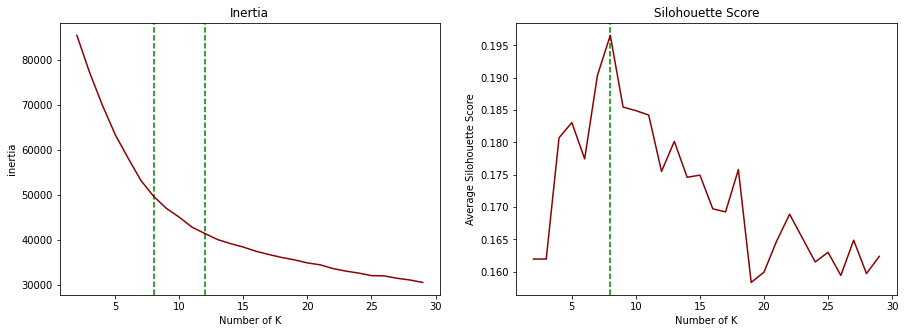

In [24]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
plt.axvline(8,linestyle="--",color="green")
plt.axvline(12, linestyle="--",color='green')
plt.xlabel("Number of K")
plt.ylabel("inertia")
sns.lineplot(KS, inertia,color="darkred")

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
plt.axvline(8,linestyle="--",color="green")
plt.xlabel("Number of K")
plt.ylabel("Average Silohouette Score")
sns.lineplot(KS, silo,color='darkred')

plt.show()

In [ ]:
k8=KMeans(8) #initaite the project
k8.fit(XX) #fit the model
labs=k8.predict(XX) 

In [ ]:
labs

**Sihouette Plot**
1. The silhouette score plot shows that the distribution of each cluster is uneven.

2. There are negative values in some of the cluster which indicates misclustering. 

3. the average sihouette score is 0.196. 

In [ ]:
silo_overall=metrics.silhouette_score(XX,k8.predict(XX))
silo_overall

silo_sample=metrics.silhouette_samples(XX,k8.predict(XX))
silo_sample

#plotting
skplt.metrics.plot_silhouette(XX,k8.predict(XX),figsize=(10,8))
plt.show()

Comparing the Sihouette average score between pcs of 14 and pcs of 8 has the a higher score. Therefore, we choose 9 pcs with 8 clusters for k-means

In [ ]:
ok_num['k8'] = labs

In [ ]:
ok_num

In [ ]:
k8=KMeans(4) #initaite the project
k8.fit(XX) #fit the model
labs=k8.predict(XX) 

In [ ]:
silo_overall=metrics.silhouette_score(XX,k8.predict(XX))
silo_overall

silo_sample=metrics.silhouette_samples(XX,k8.predict(XX))
silo_sample

#plotting
skplt.metrics.plot_silhouette(XX,k8.predict(XX),figsize=(10,8))
plt.show()